## TASK-04

### Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
df = pd.read_csv("dataset_4.csv")
df.head()

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning


In [4]:
df.describe()

,Title,Abstract,First Claim,Target
count,200,200,200,200
unique,196,200,200,4
top,Method and apparatus for machine learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
freq,3,1,1,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        200 non-null    object
 1   Abstract     200 non-null    object
 2   First Claim  200 non-null    object
 3   Target       200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
df['Target'].unique()

array(['Deep learning', 'Machine learning', 'Neural network',
       'Support vector machine'], dtype=object)

### Converting the categorical "Target" variable to numeric by Label Encoding Method

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Target'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [8]:
label.shape

(200,)

In [9]:
df.drop("Target", axis=1, inplace=True) 
df["Target"] = label
df

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,0
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,0
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,0
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,0
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,0
...,...,...,...,...
195,OBJECT CLASSIFICATION WITH CONSTRAINED MULTIPL...,This disclosure provides method and systems of...,1. A computer implemented method of classifyin...,3
196,Pre-processing input data with outlier values ...,A system and method for preprocessing input da...,1. A data preprocessor for preprocessing input...,3
197,Large scale semi-supervised linear support vec...,A computerized system and method for large sca...,1. A computerized method for semi-supervised l...,3
198,Detection of Textural Defects Using a One Clas...,Method for detecting textural defects in an im...,1. A method for detecting textural defects in ...,3


### Checking the distribution of "Target"

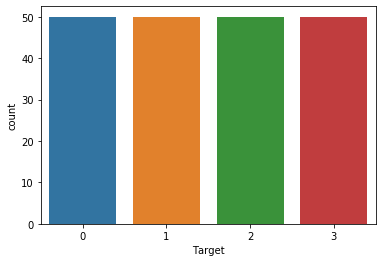

In [13]:
ax = sns.countplot(x="Target", data=df)

In [17]:
dataNonNull = df.isnull()

In [18]:
print(f'{"Columns":20}: {"All":10} {"NonNull":10} {"%NonNull":10} {"Difference"}')
for idx, col in enumerate(df.columns):
    allValue = df.count()[idx]
    nonNullValue = dataNonNull.count()[idx]
    per = nonNullValue*100/allValue
    diff = allValue - nonNullValue
    print(f'{col:20}: {allValue} {nonNullValue:10} {np.round(per):10} {diff:10}')

Columns             : All        NonNull    %NonNull   Difference
Title               : 200        200      100.0          0
Abstract            : 200        200      100.0          0
First Claim         : 200        200      100.0          0
Target              : 200        200      100.0          0


### Concatenating first 3 columns i.e, "Title", "Abstract" & "First Claim"

In [19]:
Feature = df['Title'] + df['Abstract'] + df['First Claim']

In [20]:
print(Feature)

0      Geophysical deep learningA method can include ...
1      Deep learning for algorithm portfoliosAutomate...
2      Modular deep learning modelThe technology desc...
3      Deep learning processing of videoA method and ...
4      System and method for deep learning and wirele...
                             ...                        
195    OBJECT CLASSIFICATION WITH CONSTRAINED MULTIPL...
196    Pre-processing input data with outlier values ...
197    Large scale semi-supervised linear support vec...
198    Detection of Textural Defects Using a One Clas...
199    Method and System for Analysis of Flow Cytomet...
Length: 200, dtype: object


### Cleaning the texts

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 200):
  review = re.sub('[^a-zA-Z]', ' ',Feature[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(corpus)

['geophys deep learninga method includ select type geophys data select type algorithm gener synthet geophys data base least part algorithm train deep learn framework base least part synthet geophys data gener train deep learn framework receiv acquir geophys data geolog environ implement train deep learn framework gener interpret result acquir geophys data output interpret result method compris select type geophys data select type algorithm gener synthet geophys data select type geophys data base least part algorithm train deep learn classifi framework base least part synthet geophys data gener train deep learn classifi framework receiv acquir geophys data geolog environ implement train deep learn classifi framework gener interpret result acquir geophys data output interpret result wherein interpret result character structur featur indic hydrocarbon geolog environ', 'deep learn algorithm portfoliosautom featur construct algorithm portfolio machin learn provid gray scale imag gener text 

### Creating the Bag of Words model

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 140)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Training the Naive Bayes model on the Training set

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predicting the Test set results

In [53]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 0]
 [3 3]
 [0 2]
 [3 1]
 [3 3]
 [3 3]
 [0 0]
 [0 2]
 [0 0]
 [1 3]
 [1 1]
 [3 2]
 [3 3]
 [3 3]
 [3 1]
 [0 0]
 [2 0]
 [0 2]
 [0 0]
 [1 1]
 [3 3]
 [1 2]
 [0 0]
 [3 3]
 [1 1]
 [1 2]
 [3 3]
 [3 3]
 [1 2]
 [0 0]
 [3 0]
 [2 1]
 [3 3]
 [3 2]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [2 2]]


### Accuracy & Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 8  0  1  2]
 [ 0  4  1  2]
 [ 3  3  2  2]
 [ 0  1  0 11]]


0.625